# `nbfigtulz`

`nbfigtulz` is a small library to show and save visualizations made via [matplotlib](https://matplotlib.org/) with the aim to let the user conveniently render publication ready images by default while working in [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/). The main features of `nbfigtulz` are:
- Images are generate and stored in the [PNG](https://en.wikipedia.org/wiki/Portable_Network_Graphics) and [PGF](https://en.wikipedia.org/wiki/Progressive_Graphics_File) format which lends itself perfectly for inclusion in [PDF/A-1b](https://de.wikipedia.org/wiki/PDF/A) documents.
- [PNGs](https://en.wikipedia.org/wiki/Portable_Network_Graphics) are saved [Base64](https://en.wikipedia.org/wiki/Base64) encoded within a notebook. This makes the notebook free-standing and one can send raw notebooks to colleagues without having to remember to include various additional files such as images. Note that no JavaScript is required and **one does not have to re-run the notebook to display the images**.
- Users are encouraged to render small images with high-resolution. Ideally, these images can be included without rescaling into a document.

## Examples

Below we show a few examples how to use `nbfigtulz`.

Images are stored as PNG and PGF files to disk. The default directory is `img/` (later we change this); so let us first create this directory:

In [1]:
!rm -rf img/ && mkdir img/

We then include `nbfigtulz` as `ftl` and some other libraries...

In [2]:
import nbfigtulz as ftl

import matplotlib.pyplot as plt
import numpy as np

... and create and save our first visualization using `ftl.save_fig`:

### `save_fig`

img/test.png


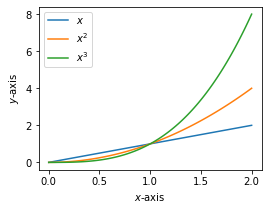

In [3]:
def make_fig(file_name):
    x = np.linspace(0., 2., 100)

    fig, ax = plt.subplots()
    
    ax.plot(x, x, label=r'$x$')
    ax.plot(x, x**2, label=r'$x^2$')
    ax.plot(x, x**3, label=r'$x^3$')
    ax.set_xlabel(r'$x$-axis')
    ax.set_ylabel(r'$y$-axis')
    ax.legend()
    
    return ftl.save_fig(fig, file_name, resize=ftl.fig_size.SMALL)


make_fig('test');

The signature of `ftl.save_fig` is:
```
def save_fig(fig, filename_base, resize=Size.SMALL, suppress_pgf=False, quiet=False, **kwargs)
```
where
- `fig` is a [`matplotlib.pyplot.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).
- `filename_base` is the desired file name of the PNG and PGF file without the file type extensions, i.e, passing `foobar` as the `filename_base` will store the image as `foobar.png` and `foobar.pgf`.
- `resize` can be used to resize the image. If not `None` this can either be a tuple of two numbers (the width and height) or an instance of `ftl.fig_size`, e.g., `ftl.fig_size.SMALL` or `ftl.fig_size.LARGE`.
- `suppress_pgf` suppressed the generation of a PGF file which can speed up the rendering process.
- `quiet`: By default the FQNs of the generate files are printed. Set `quiet` to `True` to suppress this.
- `**kwargs`: These arguments are passed through to [`matplotlib.pyplot.savefig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) which we use internally to store the images.

### `with_context`

As you may have noticed we haven't generated a PGF file in our previous example:

In [4]:
!ls img/test.pgf

ls: cannot access 'img/test.pgf': No such file or directory


This is because we didn't use a proper LaTeX backend: We provide the handy `ftl.with_context` annotation to enable such a backend using `lualatex` as the `pgf.texsystem`:

In [5]:
ftl.with_context(make_fig)('test2')

img/test2.png
img/test2.pgf


test2.png

Note also that the image is now **clickable and downloading is straightforward**! Try to close and re-open the notebook and you will see that the image will stay, i.e., no need to re-run the notebook!

More realisitically, `ftl.with_context` is meant to be used as an annotation:

In [9]:
@ftl.with_context
def make_fig():
    ...
    
# equivalent with
make_fig = ftl.with_context(make_fig)

### Changing the image directory

`img/` is the default directory where the images are stored. This can be changed with `ftl.config['img_dir']`:

In [6]:
!rm -rf img2/ && mkdir img2/
ftl.config['img_dir'] = 'img2'

From here on images will be written to `img2/`.

### `img_grid`

For arranging multiple images in a grid we provide the helper function
```
def img_grid(images, *, n_columns, width=None)
```
where
- `images` is a list of images created with `ftl.save_fig`.
- `n_columns`: number of columns.
- `width`: If not `None` the width of the entire table in units of `px`.

In [7]:
@ftl.with_context
def make_fig(p, file_name):
    x = np.linspace(0., 2., 100)

    fig, ax = plt.subplots()
    
    ax.plot(x, x**p)
    ax.set_xlabel(r'$x$-axis')
    ax.set_ylabel(r'$y$-axis')
    ax.set_title(f'$y = x^{p}$')
    
    return ftl.save_fig(fig, file_name, quiet=True)


ftl.img_grid([make_fig(p, f'test{p}') for p in range(3)], n_columns=2, width=600)

The advantage of arranging images in a grid rather than using [`matplotlib.pyplot.subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) is that each image stays clickable is saved in a separate file.